# Main description

These are SSWM simulations: monomorphic population represented by a single bitstring, that is multiplied by weights to get the trait, and the fitness is exp(trait value * beta).  

beta =0.002
nInds=1000
nLoci=500


In each iteration, a mutation occurs. Mutation means flipping a bit. This change can be accepted with probability 
p=(1-exp(delta fitness0)/(1-exp(delta fitness0*nInds)  This is different from Nick's code. Here the probability seems to be too small, because the fitness difference is too small. 
<b> SUBSTITUTION BASICALLY NEVER HAPPENS. FOR THE SAKE OF FINISHING THE CODING I AM SETTING P=0.1 for positive mutations and P=0.001 for negative ones FOR NOW</b>


If the mutation is accepted, the old genotype si replaced by the new one. I record the evolving genotype, fitness, and the mutated loci index. Then I plot evolving fitness, make histogram with nLoci bins to get the substitution count for each locus. The count should depend on the weights associated with each particular loci, if prob. of fixation was weight dependen (now it isn't). <b> NEED TO FIX THIS</b>






In [199]:
import numpy as np   
import matplotlib.pyplot as plt 
import random
%matplotlib inline

In [200]:
def oneSimulation(nLoci,nInds, beta,iterations, weights, pop0):
    pfix = 0.001
    arrayPop = []
    arrayFit = []
    arrayLoci=[]
    for i in range (iterations):
        [thisPop, thisFitness, locus] = singleIteration(nLoci, pfix, nInds, beta, weights.copy(), pop0.copy())
        arrayPop.append(thisPop)
        arrayFit.append(thisFitness)
        arrayLoci.append(locus)
        pop0=thisPop
    arrayPop=np.array(arrayPop)
    arrayFit=np.array(arrayFit)
    arrayLoci=np.array(arrayLoci)
    
    plt.plot(arrayFit)
    plt.xlabel('time')
    plt.ylabel('fitness')
    plt.show()
    noSub=arrayLoci[arrayLoci>nLoci]
    sub=arrayLoci[arrayLoci<nLoci]
    [h,b,pat]=plt.hist(sub, nLoci)
    plt.xlabel('locus number')
    plt.ylabel('substitution count')
    print ('substitution rate', (1-len(noSub)/iterations))
    plt.show()
    plt.scatter(weights,h, 1)
    plt.xlabel('weights')
    plt.ylabel('substitution count')
    
    

def singleIteration(nLoci, pfix, nInds, beta, weights, pop0):
    
    oldFitness = np.exp(np.dot(weights,pop0))  #ok this is just a train, not fitness itself
    [pop1, loc] = mutate(pop0.copy())
    newFitness = np.exp(np.dot(weights,pop1))
    #p= (1-np.exp(-(newFitness-oldFitness)*beta))/(1-np.exp(-(newFitness-oldFitness)*nInds*beta))
    p=0.1
    pMinus=0.001
    # This is the crucial part - how is the probability calculated? this way it is too small. 
    locus= 2*nLoci
    if newFitness == oldFitness: 
        a = random.random()
        if a<1/float(N):
            pop0 = pop1   #accept neutral mutation
            oldFitness = newFitness
            locus=loc
    elif newFitness>oldFitness:   #add variable prob of fixation. 
        d=random.random()
        if d<p:
            pop0=pop1
            oldFitness=newFitness
            locus=loc
    elif newFitness<oldFitness:
        d=random.random()
        if d<pMinus:
            pop0=pop1
            oldFitness=newFitness
            locus=loc
    
    return pop0, oldFitness, locus

    
def mutate(genome):     #Takes and returns genome with random bit mutated. 
    NewGenome=list(genome)
    i=random.randint(0,len(genome)-1)
    NewGenome[i]=(NewGenome[i]-1)**2
    return NewGenome, i

In [201]:
def mainRun():
    nLoci = 50  # number of loci per trait
    nInds=1000
    beta=0.002  #strength of selection on each trait
    iterations = 1000000  
    mutProb = 0.001#10.0/(nLoci*nInds)  #mutation per locus, this should result in 10 mut per gen
        
    weights = 1/np.sqrt(nLoci)*np.random.exponential(1, [ nLoci])*np.random.normal(0,1,[ nLoci])  
    #exponential distribution in random direction? 
    
    
    pop0 = np.random.randint(0,2,( nLoci))  #generate new monomorphic population
    print (np.shape(pop0))
    oneSimulation(nLoci,nInds, beta,iterations, weights, pop0)


(50,)


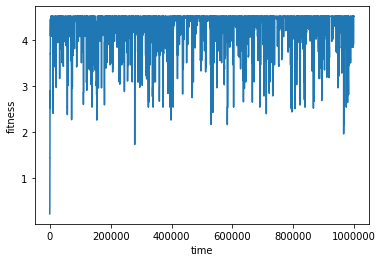

substitution rate 0.0019820000000000393


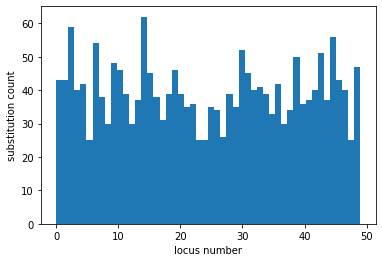

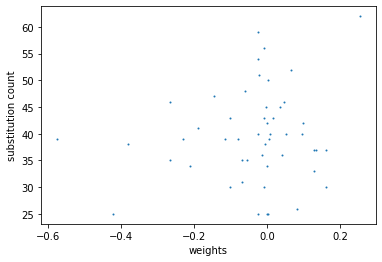

In [202]:
mainRun()

substitution rate is all over the place - independent of the weights, because my probability of acceptance is currently independen from the weights. <b> This needs to be changed </b>

moreover, I guess I should do multiple evolution trials and average across them